In [2]:
import numpy as np
from scipy import stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)




np.random.seed(1234) 
import os 
os.environ['PYTHONHASHSEED']='1234' 
import random as rn
rn.seed(1234)

In [18]:
#Pull excell Data via Pandas
#pd_data = pd.read_csv('AB_NYC_2019.csv', delimiter=',')
pd_data.head(3)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside,Entire home/apt,Private room,Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,0,0,0,0,0,0,0,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,0,0,0,0,0,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,0,0,0,0,0,0,0,0,1,0


## Print Correlation Table and Graphs

In [4]:
pd_data.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


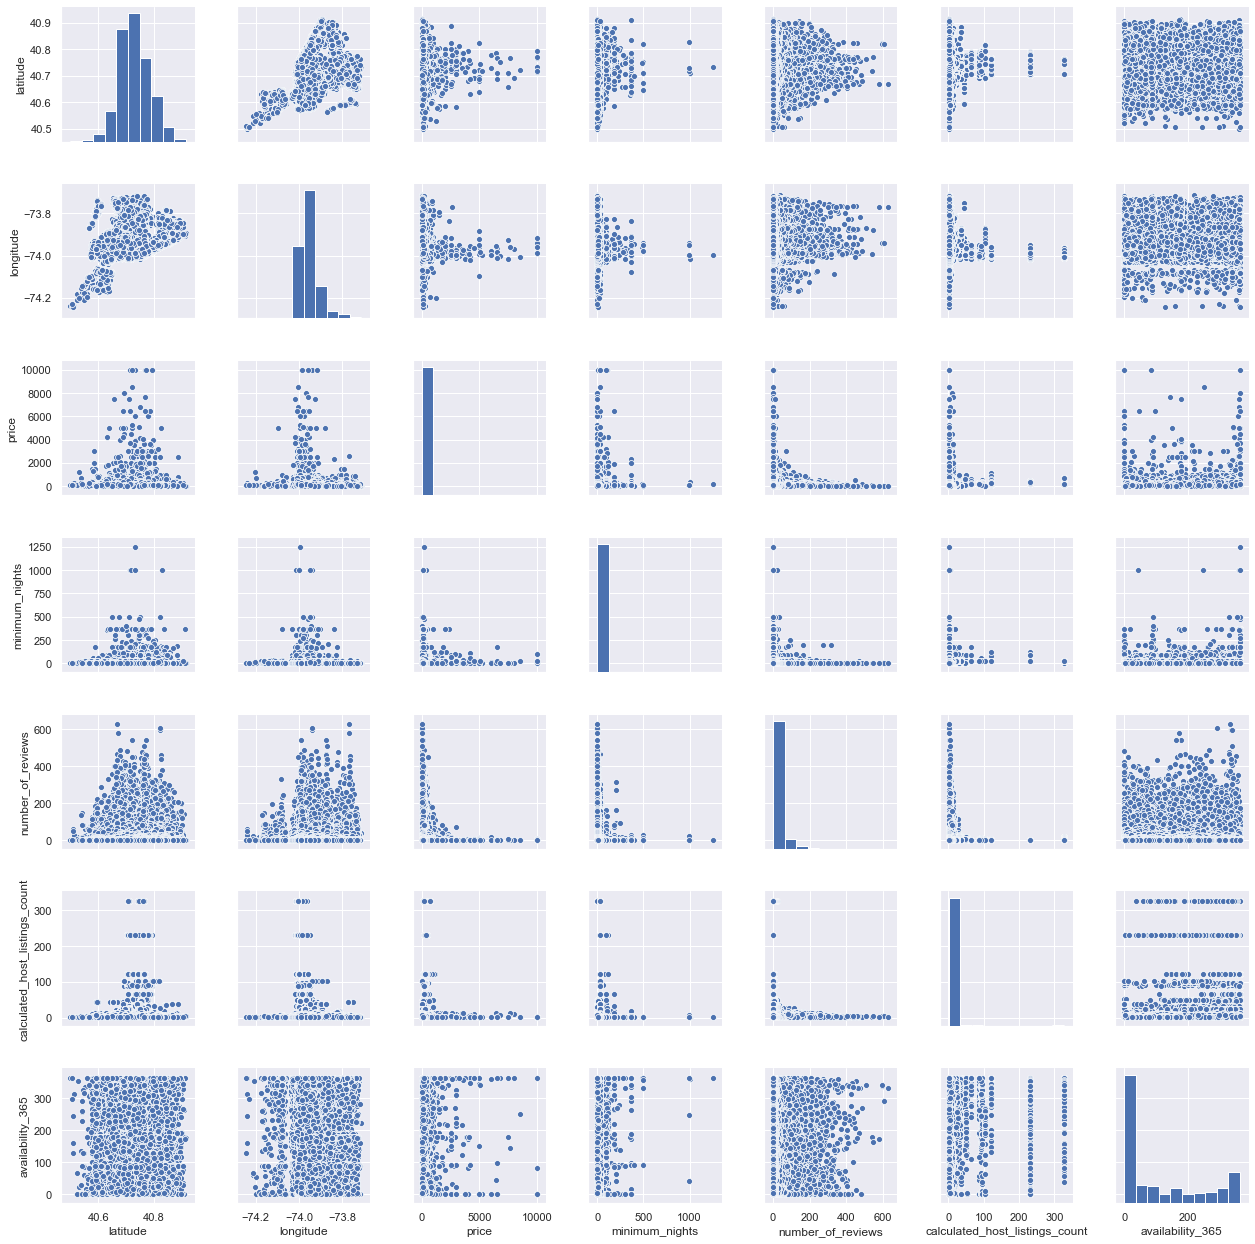

In [6]:
sns.pairplot(pd_data[['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']]);

## Make descriptive values into dummy variables

In [10]:
neighbourhood_groupDummy = pd.get_dummies(pd_data['neighbourhood_group'])
room_typeDummy = pd.get_dummies(pd_data['room_type'])
neighbourhoodDummy = pd.get_dummies(pd_data['neighbourhood'])
print(room_typeDummy.shape,
      neighbourhood_groupDummy.shape,
      neighbourhoodDummy.shape)

(48895, 3) (48895, 5) (48895, 221)


In [16]:
pd_data = pd.concat([pd_data,neighbourhood_groupDummy],axis=1)
pd_data = pd.concat([pd_data,neighbourhoodDummy],axis=1)
pd_data = pd.concat([pd_data,room_typeDummy],axis=1)

print(pd_data.shape)

(48895, 245)


## Remove Attributes that were made into Dummy Variables

In [36]:
#pd_data = pd_data.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group','neighbourhood', 'room_type', 'last_review'], axis=1)
pd_data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,Brooklyn,...,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside,Entire home/apt,Private room,Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,...,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,NaN,1,365,0,0,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,...,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Make Panda Data into Numpy array for model

In [42]:
#Export data into numpy arrays
np_data = pd_data.values

#Check that Data was imported correctly
print(np_data[0,])


[ 4.064749e+01 -7.397237e+01  1.490000e+02  1.000000e+00  9.000000e+00
  2.100000e-01  6.000000e+00  3.650000e+02  0.000000e+00  1.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.00

In [ ]:
x1 = np_data

In [ ]:
y_test = np.array(pd_data['price'])
norm_ytest = preprocessing.normalize([y_test])


x1_test = np.array(pd_data['latitude'])
#norm_x1test = preprocessing.normalize([x1_test])

x2_test = np.array(pd_data['longitude'])
norm_x2test = preprocessing.normalize([x2_test])



#plt.scatter(norm_x1test, norm_ytest)
#plt.scatter(norm_x2test, norm_ytest)


In [29]:
#Pullout Lat & long for model test
x_fake_train = np_data[1:101, 4:]
y_fake_train = np_data[1:101, 9]

#print(x_fake_train.shape,y_fake_train.shape)

ones = np.ones([x_fake_train.shape[0], 1])   #Add additional column to x Data for intercept
x_fake_train = np.concatenate((ones,x_fake_train),axis=1)

#Normalize
y_fake_train /= np.max(y_fake_train)
x_fake_train[:,1] /= np.max(x_fake_train[:,1])
x_fake_train[:,2] /= np.max(x_fake_train[:,2])

#Scale Data

#print(x_fake_train.shape,y_fake_train.shape)
#x_fake_train

Text(0, 0.5, 'Pricing')

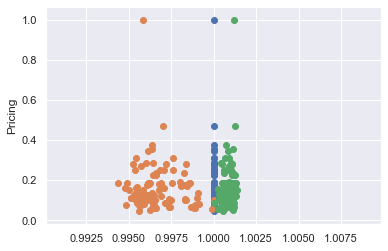

In [20]:
plt.scatter(x_fake_train[:,0], y_fake_train)
plt.scatter(x_fake_train[:,1], y_fake_train)
plt.scatter(x_fake_train[:,2], y_fake_train)
plt.ylabel('Pricing')

In [27]:
#Define gradient descent

def Gradient_Descent(x_train, y_train, alpha, iterations):
    n = len(y_train)
    m = np.random.randn(3)
    Cost = np.zeros(iterations)
    for i in range(iterations):
        y_pred = x_train.dot(m)
        RSS = np.sum(y_train - y_pred)
        m = m - (alpha / n) * (y_train - y_pred).dot(x_train)
        Cost[i] = Cost_Funct(y_train, y_pred)
        if (i % 10 == 0):
            print(Cost[i])
        
    return m, Cost

#Define Cost Function

def Cost_Funct(y_train, y_pred):
    n = len(y_train)
    cost = (2 / n) * np.sum(np.power(y_train - y_pred, 2))
    return cost


0.03786207242414944
0.19966190974867523
2.8362713759957567
45.80114459628977
745.9352959739671
12154.972334611637
198070.9512837336
3227665.0451196423
52596419.819647245
857085031.9893059


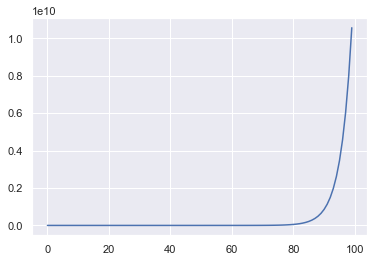

In [28]:
#Make linear regressiong model
theta = np.random.randn(3)

iterations = 100
alpha = 0.05

beta, Cost = Gradient_Descent(x_fake_train, y_fake_train, alpha, iterations)

plt.plot(range(iterations), Cost)
